# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st                # scipy.stats.sem, scipy.stats.describe
import numpy as np                      # np.mean(), np.std(), etc... (vectorized)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview

df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = df.groupby('Mouse ID')['Timepoint'].apply(lambda row: row.duplicated().any())
mouse_ids_with_duplicates = duplicates[duplicates].index.tolist()

mouse_ids_with_duplicates

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = df[df['Mouse ID'].isin(mouse_ids_with_duplicates)]
print("Data associated with Mouse IDs with duplicate Timepoints:")

duplicate_data

Data associated with Mouse IDs with duplicate Timepoints:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# get all the rows that aren't in our duplicated ID pd.DataFrame:
cleaned_df = df[~df['Mouse ID'].isin(mouse_ids_with_duplicates)]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

# 249 - 1
cleaned_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

import numpy as np

cleaned_df = cleaned_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
cleaned_df

# empty pd.DataFrame
summary = pd.DataFrame()

# Group by 'Drug Regimen', apply on 'Tumor Volume' values
regimen_groups = cleaned_df.groupby('Drug Regimen')['Tumor Volume']

# mean of the values
summary['mean'] = regimen_groups.apply(np.mean)

# medium of the values
summary['median'] = regimen_groups.apply(np.median)

# variance
summary['variance'] = regimen_groups.apply(np.var)

# sample standard deviation
summary['stddev'] = regimen_groups.apply(np.std)

# Unbiased Standard Error of the Mean
summary['SEM'] = regimen_groups.apply(st.sem)

"""
cleaned_df.groupby('Drug Regimen')['Tumor Volume'].agg(['mean', 'median', 'var', 'std', 'sem'])
"""
summary2 = cleaned_df.groupby('Drug Regimen')['Tumor Volume'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary.reset_index()

,Drug Regimen,mean,median,variance,stddev,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
6,Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.groupby('Drug Regimen')['Tumor Volume'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

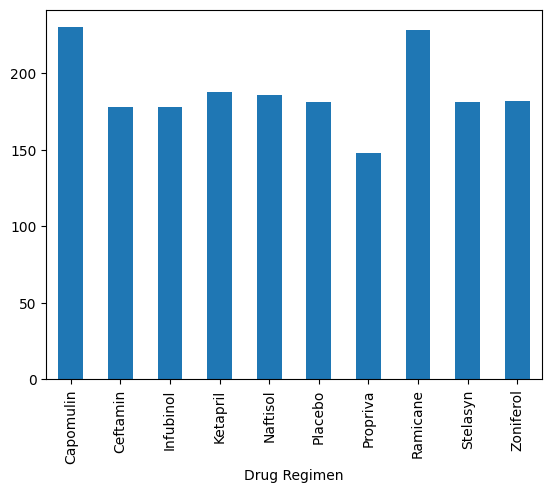

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_drug_regimen = cleaned_df.groupby('Drug Regimen').size()
num_drug_regimen.plot(kind='bar')

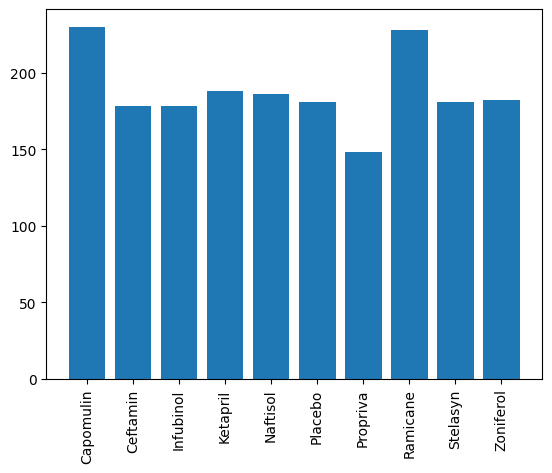

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Use ; to prevent REPL of last expression
plt.bar(num_drug_regimen.index, num_drug_regimen.values)
plt.xticks(rotation=90);

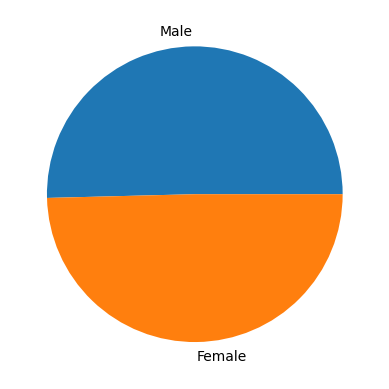

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_sample_size = cleaned_df['Mouse ID'].nunique()
unique_mice_id_gender = cleaned_df.groupby('Mouse ID')['Sex'].last()    # .first(), .nth(0), etc...
gender_counts = unique_mice_id_gender.value_counts()


# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index);


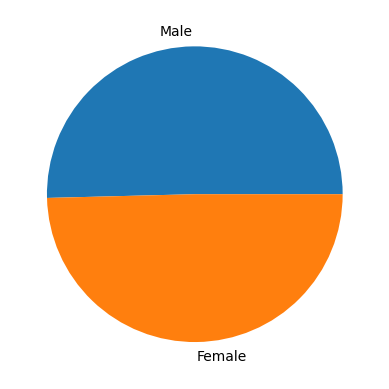

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
total_sample_size = cleaned_df['Mouse ID'].nunique()

# Each Mouse (Mouse ID) corresponds to one gender, we only need 1 (first, last, nth)
unique_mice_id_gender = cleaned_df.groupby('Mouse ID')['Sex'].last()    # .first(), .nth(0), etc...
gender_counts = unique_mice_id_gender.value_counts()

# Make the pie chart

plt.pie(gender_counts, labels=gender_counts.index);


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens = [
    'Capomulin',
    'Ramicane',
    'Infubinol',
    'Ceftamin'
]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')
merged_df = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]
last_timepoint_tumor_volume = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume', 'Drug Regimen']]
last_timepoint_tumor_volume

,Mouse ID,Timepoint,Tumor Volume,Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
3,a275,45,62.999356,Ceftamin
6,a411,45,38.407618,Ramicane
7,a444,45,43.047543,Ramicane
...,...,...,...,...
238,y769,45,68.594745,Ceftamin
239,y793,45,31.896238,Capomulin
240,y865,45,64.729837,Ceftamin
244,z578,45,30.638696,Ramicane


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens

# Create empty list to fill with tumor vol data (for plotting)
# using dict instead
D = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for r in treatment_regimens:
    vol = last_timepoint_tumor_volume[last_timepoint_tumor_volume['Drug Regimen'] == r]['Tumor Volume']

    # add subset
    D[r] = vol
    # Determine outliers using upper and lower bounds
    q_1 = D[r].quantile(0.25)
    q_3 = D[r].quantile(0.75)

    IQR = q_3 - q_1

    lower = q_1 - 1.5 * IQR
    upper = q_3 + 1.5 * IQR

    outliers = vol[(vol < lower) | (vol > upper)]

    D[r] = {
        'regimen': r,
        'vol': vol,
        'Q1': q_1,
        'Q3': q_3,
        'IQR': IQR,
        'upper': upper,
        'lower': lower,
        'outliers': outliers,
    }

outliers = [D[r]['outliers'] for r in treatment_regimens]



Text(0.5, 1.0, 'Volume (mm^3)/Treatment Regimen')

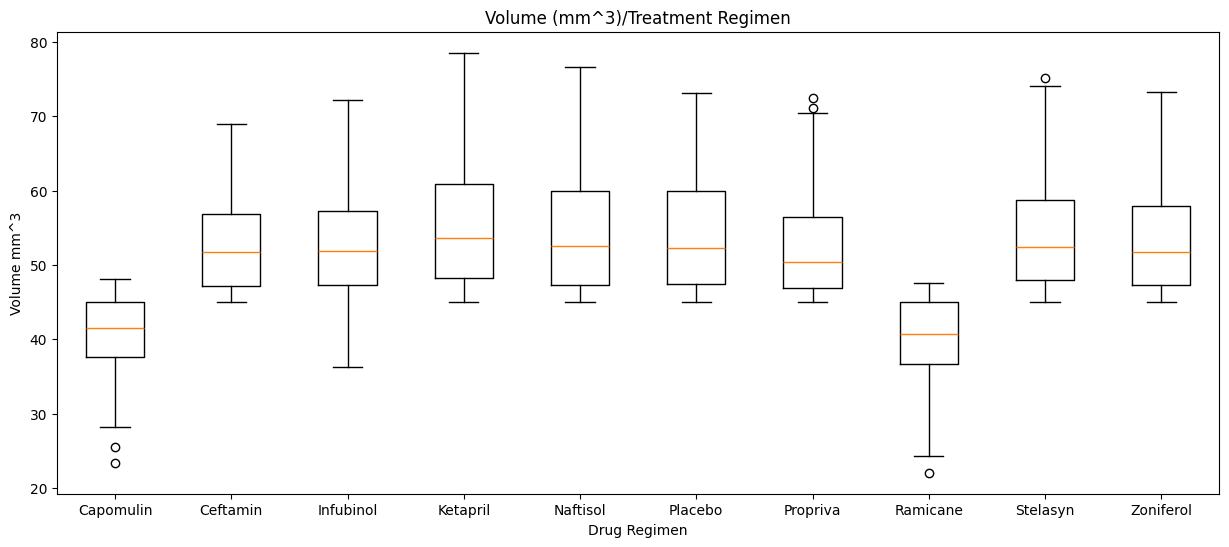

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
groups = cleaned_df.groupby('Drug Regimen')['Tumor Volume']

data = []
labels = []


for regimen, group in groups:
    data.append(group.values)
    labels.append(regimen)


plt.figure(figsize=(15, 6))
plt.boxplot(data, tick_labels=labels);
plt.xlabel('Drug Regimen')
plt.ylabel('Volume mm^3')
plt.title('Volume (mm^3)/Treatment Regimen')

## Line and Scatter Plots

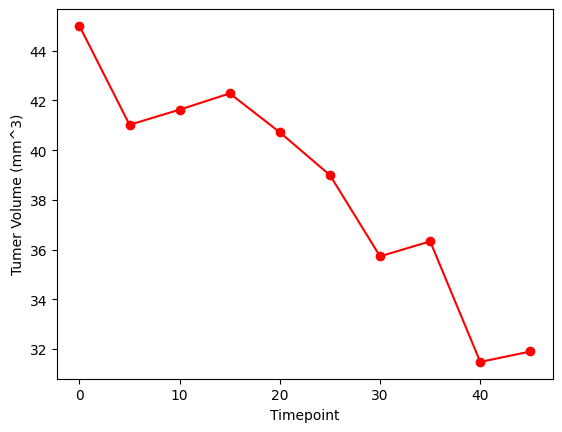

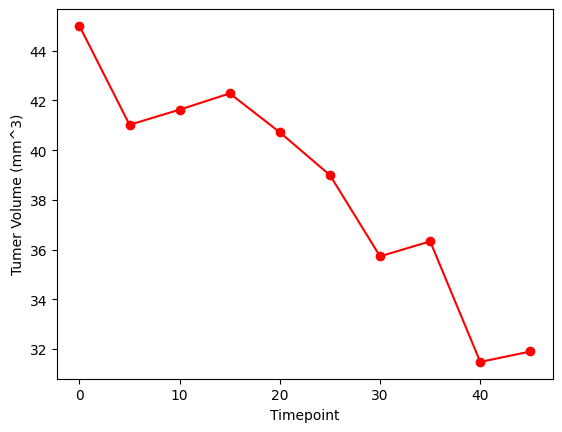

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
def gen_line_plot(mouseID, xLabel='Timepoint', yLabel='Tumer Volume (mm^3)'):
    r = 'Capomulin'
    d = cleaned_df[(cleaned_df['Mouse ID'] == mouseID) & (cleaned_df['Drug Regimen'] == r)]
    # print(d)
    plt.figure()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.plot(d['Timepoint'], d['Tumor Volume'], marker='o', color='r', label=f'Mouse ID: {mouseID}')

mouse_id = 'y793'
gen_line_plot('y793');
gen_line_plot(mouse_id)

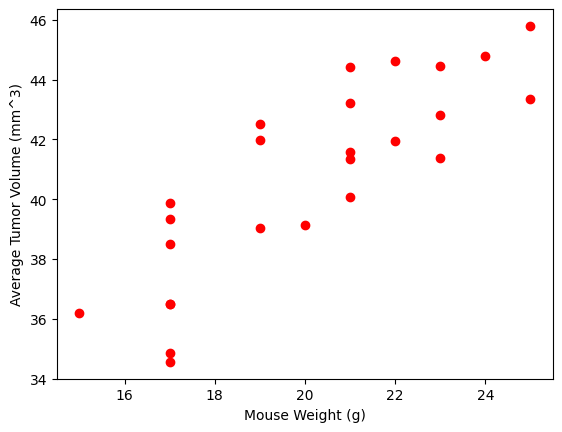

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weights, avg_tumor_volume, marker='o', color='r')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm^3)')
plt.title = 'Mouse Weight (g) vs. Average Observed Tumor Volume (mm^3)'


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


